In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [2]:
df= pd.read_csv("Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [3]:
df.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [4]:
df = df.dropna()
print(df.isna().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [5]:
df.shape

(18634, 3)

In [6]:
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)

Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


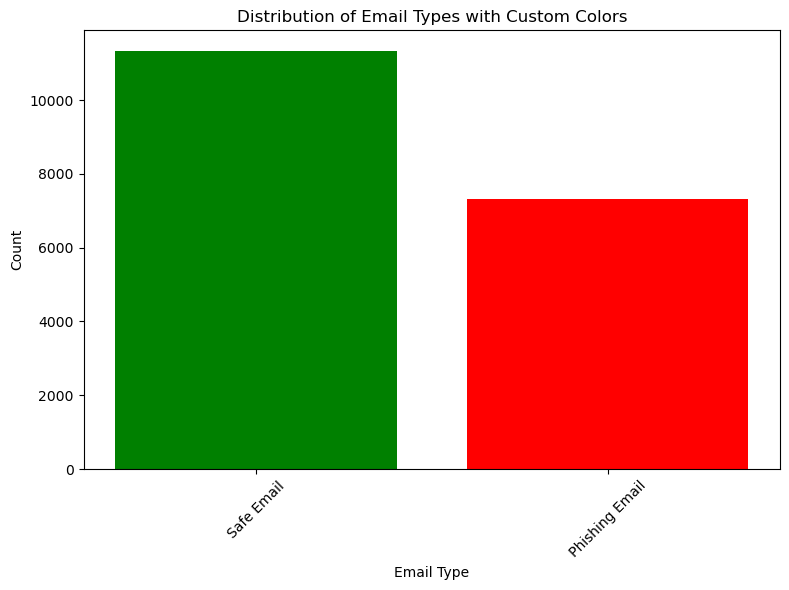

In [7]:
unique_email_types = email_type_counts.index.tolist()

color_map = {
    'Phishing Email': 'red',
    'Safe Email': 'green',}


colors = [color_map.get(email_type, 'gray') for email_type in unique_email_types]


plt.figure(figsize=(8, 6))
plt.bar(unique_email_types, email_type_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types with Custom Colors')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

In [8]:
Safe_Email = df[df["Email Type"]== "Safe Email"]
Phishing_Email = df[df["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [9]:
Safe_Email.shape,Phishing_Email.shape

((7312, 3), (7312, 3))

In [10]:
Data= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
Data.head()

,Unnamed: 0,Email Text,Email Type
0,17658,URL: http://boingboing.net/#85483339\nDate: No...,Safe Email
1,8903,"calpine force majeure - dec 99 hi daren , i sp...",Safe Email
2,9461,fw : on call - - - - - original message - - - ...,Safe Email
3,2869,met a family in our parent-baby group with a s...,Safe Email
4,16970,forwarded message:> From: Ian Andrew Bell > Da...,Safe Email


In [11]:
X = Data["Email Text"].values
y = Data["Email Type"].values

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

###### Model => RandomForestClassifier
Test Accuracy : 93.41386%
Classification Report
                precision    recall  f1-score   support

Phishing Email       0.90      0.97      0.94      2198
    Safe Email       0.97      0.90      0.93      2190

      accuracy                           0.93      4388
     macro avg       0.94      0.93      0.93      4388
  weighted avg       0.94      0.93      0.93      4388

Confusion Matrix


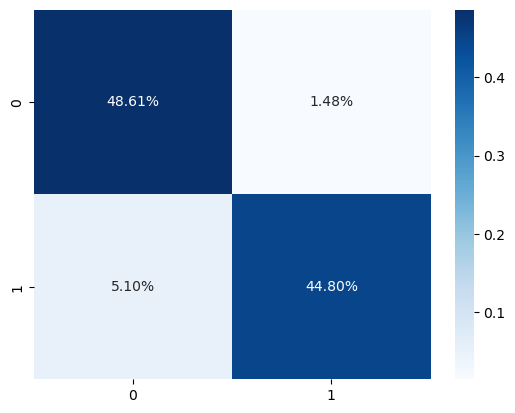

################### End ###################
###### Model => DecisionTreeClassifier
Test Accuracy : 89.88149%
Classification Report
                precision    recall  f1-score   support

Phishing Email       0.89      0.91      0.90      2198
    Safe Email       0.91      0.89      0.90      2190

      accuracy                           0.90      4388
     macro avg       0.90      0.90      0.90      4388
  weighted avg       0.90      0.90      0.90      4388

Confusion Matrix


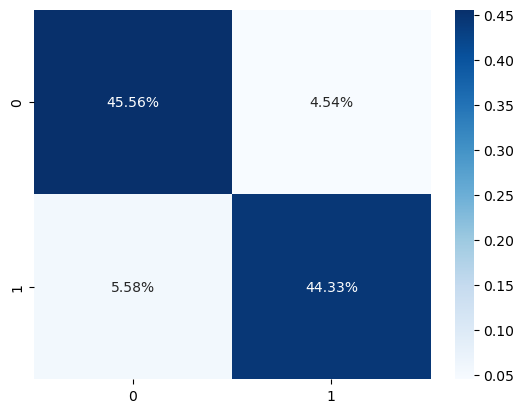

################### End ###################
###### Model => AdaBoostClassifier
Test Accuracy : 92.54786%
Classification Report
                precision    recall  f1-score   support

Phishing Email       0.91      0.95      0.93      2198
    Safe Email       0.94      0.90      0.92      2190

      accuracy                           0.93      4388
     macro avg       0.93      0.93      0.93      4388
  weighted avg       0.93      0.93      0.93      4388

Confusion Matrix


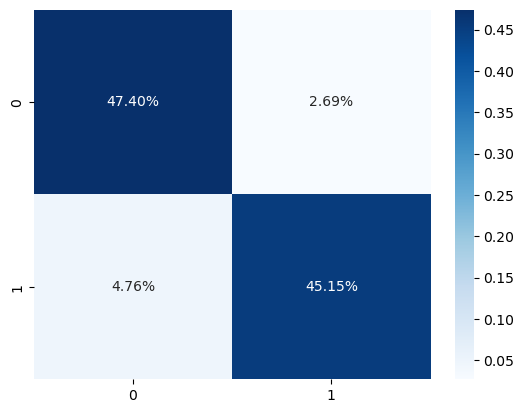

################### End ###################
###### Model => SGDClassifier
Test Accuracy : 97.60711%
Classification Report
                precision    recall  f1-score   support

Phishing Email       0.96      0.99      0.98      2198
    Safe Email       0.99      0.96      0.98      2190

      accuracy                           0.98      4388
     macro avg       0.98      0.98      0.98      4388
  weighted avg       0.98      0.98      0.98      4388

Confusion Matrix


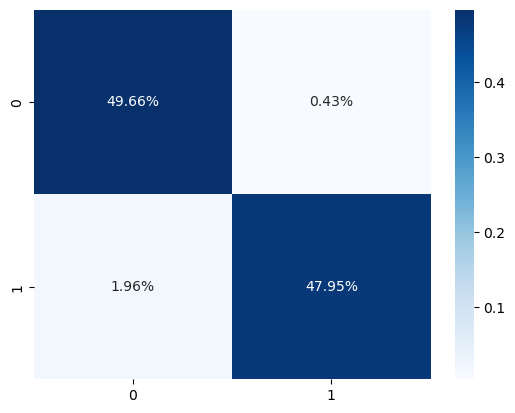

################### End ###################
###### Model => LogisticRegression
Test Accuracy : 96.78669%
Classification Report
                precision    recall  f1-score   support

Phishing Email       0.95      0.98      0.97      2198
    Safe Email       0.98      0.95      0.97      2190

      accuracy                           0.97      4388
     macro avg       0.97      0.97      0.97      4388
  weighted avg       0.97      0.97      0.97      4388

Confusion Matrix


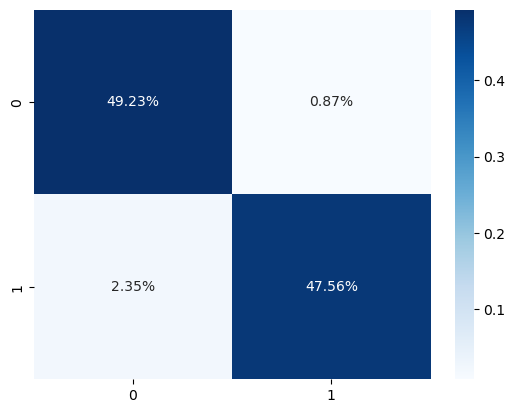

################### End ###################


In [14]:
models = [
    (Pipeline([("tfidf", TfidfVectorizer()), ("classifier", RandomForestClassifier())]), {'classifier__n_estimators': [10]}),
    (Pipeline([("tfidf", TfidfVectorizer()), ("classifier", DecisionTreeClassifier())]), {'classifier__max_depth': [None, 10]}),
    (Pipeline([("tfidf", TfidfVectorizer()), ("classifier", AdaBoostClassifier())]), {'classifier__n_estimators': [50], 'classifier__learning_rate': [1.0]}),
    (Pipeline([("tfidf", TfidfVectorizer()), ("classifier", SGDClassifier())]), {'classifier__max_iter': [1000], 'classifier__tol': [1e-3]}),
    (Pipeline([("tfidf", TfidfVectorizer()), ("classifier", LogisticRegression())]), {'classifier__C': [1.0], 'classifier__max_iter': [100]})
]

accuracy_test = []
model_names = []

for pipeline, params in models:
    model_name = pipeline.steps[-1][1].__class__.__name__
    print(f'###### Model => {model_name}')
    
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracy_test.append(acc)
    model_names.append(model_name)
    
    print(f'Test Accuracy : {acc*100:.5f}%')
    print('Classification Report')
    print(classification_report(y_test, pred))
    print('Confusion Matrix')
    cf_matrix = confusion_matrix(y_test, pred)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.show()
    print('################### End ###################')

In [15]:
model_series = pd.Series(model_names, name='Model').astype(str)  
accuracy_series = pd.Series(accuracy_test, name='Accuracy')  
output = pd.concat([model_series, accuracy_series], axis=1)

In [16]:
output

,Model,Accuracy
0,RandomForestClassifier,0.934139
1,DecisionTreeClassifier,0.898815
2,AdaBoostClassifier,0.925479
3,SGDClassifier,0.976071
4,LogisticRegression,0.967867


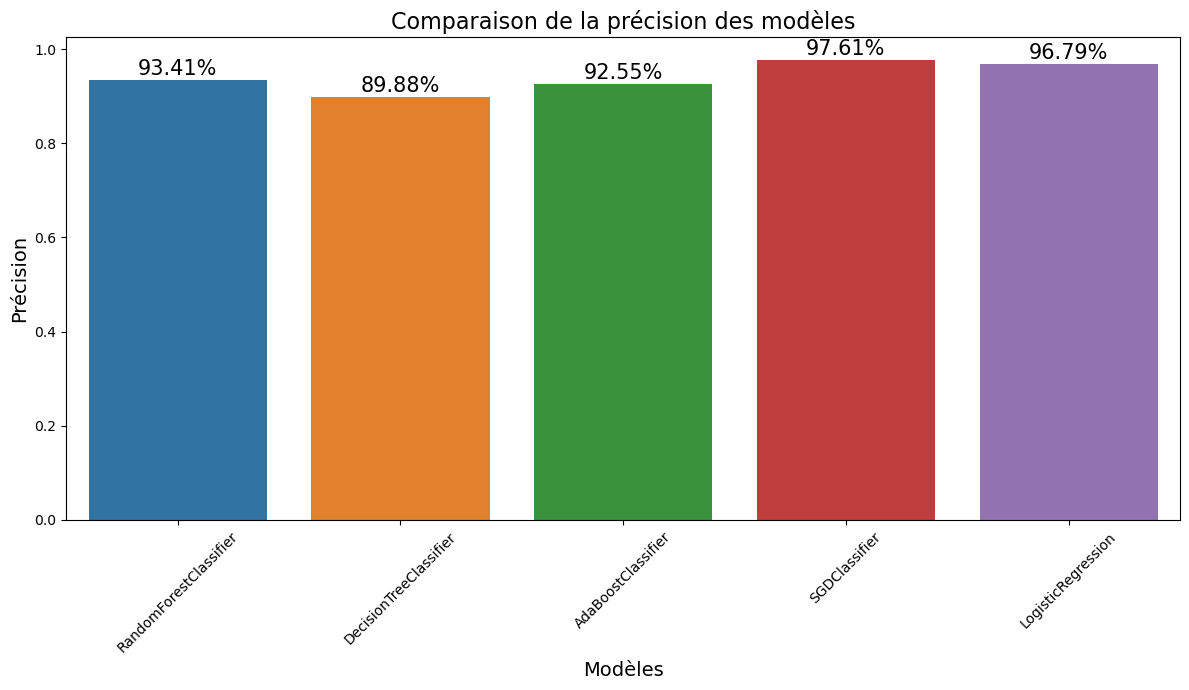

In [17]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='Accuracy', data=output)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2%'), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Modèles", fontsize=14)
plt.ylabel("Précision", fontsize=14)
plt.title("Comparaison de la précision des modèles", fontsize=16)  
plt.xticks(rotation=45)  
plt.tight_layout()  

plt.show()

In [ ]:
# Adding another model